In [87]:
from run import read_data
import src.utils as utils
from config import Config

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data_utils
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [269]:
# data related section
data_raw = read_data(Config.PATH)
data_raw = utils.prepare_data(data_raw, station=Config.STATION, features=Config.FEATURES_LIST)

train_data = data_raw.copy()
train_scaler = MinMaxScaler()
train_scaler, train_data[Config.FEATURES_2_SCALE] = utils.normalize_data(
        train_scaler,
        train_data[Config.FEATURES_2_SCALE].values)

train_data = utils.make_features(train_data, features=Config.FEATURES_LIST)

x_features, y_features = utils.generate_train_data(
    train_data, features=Config.FEATURES_LIST, dt_from=Config.FILTER_DT_FROM, dt_till=Config.FILTER_DT_TILL
)

x_features_a, y_features_a = utils.generate_train_data(
    train_data, features=Config.FEATURES_LIST, dt_till="2006-01-01 00:00:00"
)



/home/vlsta001/git_projects/ncps-slaf/slaf-project/run.py:25: DtypeWarning: Columns (15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  else:


In [272]:
train_data[train_data.index < "2006-01-01 00:00:00"]

,x,y,x_shifted_week,x_shifted_year,WorkDay,LastDayWasHolodiayAndNotWeekend,NextDayIsHolidayAndNotWeekend,MeanLastWeek,MeanLastTwoDays,MaxLastOneDay,MinLastOneDay
datetime,,,,,,,,,,,
2005-10-09 01:00:00,0.175065,0.115179,0.115676,0.218568,0.0,0.0,0.0,0.167371,0.286633,0.279635,0.180003
2005-10-09 02:00:00,0.139010,0.088432,0.088184,0.163398,0.0,0.0,0.0,0.167996,0.287576,0.279635,0.180003
2005-10-09 03:00:00,0.121199,0.068574,0.065471,0.125109,0.0,0.0,0.0,0.168370,0.287801,0.279635,0.180003
2005-10-09 04:00:00,0.106057,0.061313,0.057714,0.105002,0.0,0.0,0.0,0.168618,0.287529,0.279635,0.181001
2005-10-09 05:00:00,0.105995,0.058458,0.053742,0.095445,0.0,0.0,0.0,0.168725,0.286758,0.279635,0.180336
...,...,...,...,...,...,...,...,...,...,...,...
2005-12-31 20:00:00,0.464441,0.399839,0.313640,0.352489,0.0,0.0,0.0,0.504372,0.415450,0.395385,0.315921
2005-12-31 21:00:00,0.453333,0.381097,0.317053,0.322266,0.0,0.0,0.0,0.503086,0.411562,0.367825,0.315921
2005-12-31 22:00:00,0.434467,0.352675,0.310972,0.296761,0.0,0.0,0.0,0.501660,0.407520,0.341589,0.315921


In [270]:
x_features.shape[0]/x_features_a.shape[0]

13.046130952380953

In [271]:
x_features

tensor([[0.3442, 0.4036, 0.3198,  ..., 0.4267, 0.4213, 0.4303],
        [0.3292, 0.3826, 0.2945,  ..., 0.4289, 0.4213, 0.4303],
        [0.3258, 0.3781, 0.2860,  ..., 0.4309, 0.4213, 0.4303],
        ...,
        [0.4245, 0.2213, 0.3656,  ..., 0.2447, 0.2405, 0.1989],
        [0.3932, 0.1995, 0.3537,  ..., 0.2449, 0.2405, 0.1989],
        [0.3621, 0.1658, 0.3259,  ..., 0.2454, 0.2405, 0.1989]])

In [255]:
# data related section
data_raw = read_data(Config.PATH)
data_raw = utils.prepare_data(data_raw, station=Config.STATION, features=Config.FEATURES_LIST)

train_data = data_raw.copy()
train_data.value, min_value, max_value = utils.normalize_data(
    train_data.value)

train_data.MeanLastWeek, min_value, max_value = utils.normalize_data(
    train_data.MeanLastWeek)

train_data.MeanLastTwoDays, min_value, max_value = utils.normalize_data(
    train_data.MeanLastTwoDays)

train_data.MaxLastOneDay, min_value, max_value = utils.normalize_data(
    train_data.MaxLastOneDay)

train_data.MinLastOneDay, min_value, max_value = utils.normalize_data(
    train_data.MinLastOneDay)

train_data = utils.make_features(train_data, features=Config.FEATURES_LIST)

x_features, y_features = utils.generate_train_data(
    train_data, features=Config.FEATURES_LIST
)

ds = data_utils.TensorDataset(
    x_features, y_features
)

dataloader = data_utils.DataLoader(
    ds,
    batch_size=Config.BATCH_SIZE,
    num_workers=Config.NUM_WORKERS,
    shuffle=True, 
)

out_features = y_features.shape[-1]
in_features = x_features.shape[-1]

/home/vlsta001/git_projects/ncps-slaf/slaf-project/run.py:24: DtypeWarning: Columns (15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [195]:
train_data.columns

Index(['x', 'y', 'x_shifted_week', 'x_shifted_year', 'Holiday', 'WorkDay',
       'LastDayWasNotWorkDay', 'LastDayWasNotWorkDayAndNowWorkDay',
       'NextDayIsNotWorkDayAndNowWorkDay', 'LastDayWasHolodiayAndNotWeekend',
       'NextDayIsHolidayAndNotWeekend', 'MeanLastWeek', 'MeanLastTwoDays',
       'MaxLastOneDay', 'MinLastOneDay'],
      dtype='object')

In [196]:
train_data

,x,y,x_shifted_week,x_shifted_year,Holiday,WorkDay,LastDayWasNotWorkDay,LastDayWasNotWorkDayAndNowWorkDay,NextDayIsNotWorkDayAndNowWorkDay,LastDayWasHolodiayAndNotWeekend,NextDayIsHolidayAndNotWeekend,MeanLastWeek,MeanLastTwoDays,MaxLastOneDay,MinLastOneDay
datetime,,,,,,,,,,,,,,,
2005-10-09 01:00:00,0.175065,0.115179,0.115676,0.218568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167371,0.286633,0.279635,0.180003
2005-10-09 02:00:00,0.139010,0.088432,0.088184,0.163398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167996,0.287576,0.279635,0.180003
2005-10-09 03:00:00,0.121199,0.068574,0.065471,0.125109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168370,0.287801,0.279635,0.180003
2005-10-09 04:00:00,0.106057,0.061313,0.057714,0.105002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168618,0.287529,0.279635,0.181001
2005-10-09 05:00:00,0.105995,0.058458,0.053742,0.095445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.168725,0.286758,0.279635,0.180336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-01 20:00:00,0.440176,0.434281,0.567643,0.594080,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.309100,0.279481,0.580877,0.164282
2018-08-01 21:00:00,0.432853,0.426710,0.524513,0.553494,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.310089,0.287948,0.580877,0.164282
2018-08-01 22:00:00,0.413988,0.410575,0.495222,0.520231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.311090,0.296521,0.580877,0.164282


In [268]:
train_data.corr(numeric_only=True)

,x,y,x_shifted_week,x_shifted_year,MeanLastWeek,MeanLastTwoDays,MaxLastOneDay,MinLastOneDay
x,1.000000,0.874559,0.711692,0.718182,0.425790,0.346102,0.362597,0.356669
y,0.874559,1.000000,0.757578,0.654345,0.420235,0.316427,0.323385,0.322800
x_shifted_week,0.711692,0.757578,1.000000,0.641188,0.443001,0.320638,0.322955,0.328252
x_shifted_year,0.718182,0.654345,0.641188,1.000000,0.542576,0.514549,0.555025,0.523473
MeanLastWeek,0.425790,0.420235,0.443001,0.542576,1.000000,0.852954,0.760113,0.755175
MeanLastTwoDays,0.346102,0.316427,0.320638,0.514549,0.852954,1.000000,0.908096,0.864071
MaxLastOneDay,0.362597,0.323385,0.322955,0.555025,0.760113,0.908096,1.000000,0.717941
MinLastOneDay,0.356669,0.322800,0.328252,0.523473,0.755175,0.864071,0.717941,1.000000


In [256]:
cols = list(train_data.columns.copy())

In [257]:
cols.remove('y')

In [258]:
cols

['x',
 'x_shifted_week',
 'x_shifted_year',
 'MeanLastWeek',
 'MeanLastTwoDays',
 'MaxLastOneDay',
 'MinLastOneDay']

In [147]:
# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x_features[:, -4:])

In [237]:
x_features = x_features[:, :4]
cols = cols[:4]

In [200]:
len(cols)

14

In [210]:
# Apply PCA to the scaled data
pca = PCA()
X_train_pca = pca.fit_transform(x_features)
#X_test_pca = pca.transform(X_test)

# Explained variance ratio to understand the amount of variance each component explains
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print the cumulative explained variance to decide on the number of components
print("Cumulative Variance Explained by Components: ", cumulative_variance)

Cumulative Variance Explained by Components:  [0.3358606  0.59036735 0.72493438 0.83933272 0.87628204 0.90587578
 0.92947146 0.95143078 0.96960573 0.97862362 0.98670456 0.99315032
 0.998959   1.        ]


In [211]:
import pandas as pd

In [212]:
# Loadings (coefficients of the original features)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(x_features.shape[1])], index=[cols[i] for i in range(x_features.shape[1])])

In [213]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
x,-0.059371,0.070401,0.274590,-0.059036,0.413487,0.331994,-0.157734,-0.103913,-0.049089,0.076980,0.000194,-0.675824,-0.361116,0.016883
x_shifted_week,0.010090,0.047707,0.283843,-0.083465,0.499181,0.184428,-0.122766,-0.076383,0.017527,0.340882,0.160997,0.668660,-0.127722,-0.011873
x_shifted_year,-0.063723,0.070111,0.332694,-0.050869,0.238240,0.211068,-0.086195,-0.094344,-0.026433,-0.596025,-0.230820,0.056185,0.584792,-0.075840
Holiday,0.040248,-0.064207,0.010502,0.016620,0.122499,0.378466,0.656638,0.626112,0.043482,-0.079630,0.017393,0.021959,-0.057190,-0.012310
WorkDay,-0.454082,0.755099,-0.035055,-0.203833,0.118727,-0.328747,0.217817,0.050741,0.080493,-0.004076,-0.011950,-0.013941,-0.034421,-0.025516
LastDayWasNotWorkDay,0.752853,0.255919,0.097383,0.257739,0.270650,-0.362770,0.232021,-0.120425,0.080136,-0.070841,-0.036543,-0.073053,-0.021237,0.007193
LastDayWasNotWorkDayAndNowWorkDay,0.334098,0.559522,0.039782,-0.029007,-0.442904,0.458071,-0.260120,0.130629,-0.264382,0.012984,0.043716,0.087587,-0.044973,0.022335
NextDayIsNotWorkDayAndNowWorkDay,-0.302289,0.133335,-0.041843,0.924678,0.033760,0.139210,0.006471,-0.079608,-0.051636,0.035646,0.019486,0.039743,0.021021,0.028726
LastDayWasHolodiayAndNotWeekend,0.045617,0.086350,0.021936,0.028273,-0.152377,0.213402,-0.114579,-0.035780,0.950469,0.025541,0.003973,-0.019604,0.014662,-0.036818
NextDayIsHolidayAndNotWeekend,0.019751,-0.008980,0.015887,0.121645,0.187626,-0.304586,-0.567630,0.724113,0.054182,-0.076554,-0.002756,-0.031454,-0.003816,-0.012318


In [214]:
# Calculate aggregate importance
aggregate_importance = loadings.abs().sum(axis=1)
selected_features = aggregate_importance.nlargest(5)  # Select top 5 features
print("Selected Features:\n", selected_features)

Selected Features:
 MaxLastOneDay                        2.841742
LastDayWasNotWorkDayAndNowWorkDay    2.730109
MeanLastWeek                         2.729241
x_shifted_year                       2.717338
x                                    2.650614
dtype: float64


In [126]:
aggregate_importance

x                                    1.875939
x_shifted_week                       2.097047
x_shifted_year                       1.866635
Mo                                   2.979572
Di                                   2.387424
Mi                                   2.711937
Do                                   2.743103
Fr                                   2.765931
Sa                                   2.565738
Holiday                              2.360608
WorkDay                              2.786322
LastDayWasNotWorkDay                 2.668078
LastDayWasNotWorkDayAndNowWorkDay    2.870970
NextDayIsNotWorkDayAndNowWorkDay     2.540213
LastDayWasHolodiayAndNotWeekend      2.489640
NextDayIsHolidayAndNotWeekend        2.059262
MeanLastWeek                         1.958282
MeanLastTwoDays                      1.942461
MaxLastOneDay                        1.452720
MinLastOneDay                        1.541603
dtype: float64

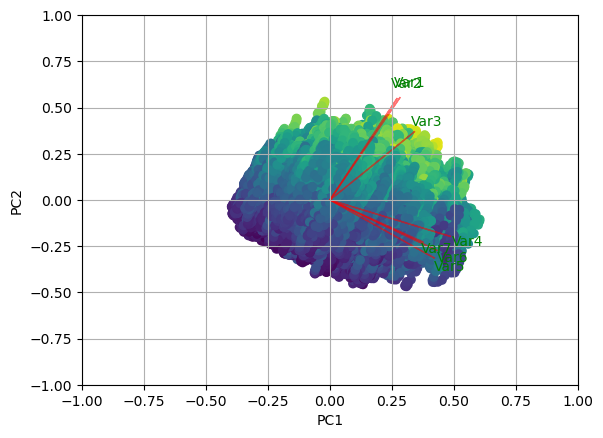

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA()
x_new = pca.fit_transform(x_features)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y_features)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [243]:
pca.explained_variance_ratio_

array([0.75095989, 0.19572001, 0.03052938, 0.02279072])

In [266]:
print(abs( pca.components_ ))

[[0.28133834 0.26948313 0.33957795 0.48403051 0.41835315 0.42932758
  0.3732122 ]
 [0.55163022 0.54662528 0.36766876 0.19672403 0.31232989 0.27176328
  0.22719816]
 [0.14554712 0.48732611 0.52688603 0.5605684  0.04560124 0.3839207
  0.00298398]
 [0.12020328 0.23745538 0.13650062 0.04851284 0.03491408 0.5952219
  0.7434192 ]
 [0.54120493 0.57508982 0.0644344  0.49062232 0.08941584 0.12230605
  0.3294737 ]
 [0.53663688 0.06228444 0.66336896 0.38511594 0.19682959 0.20188033
  0.20067707]
 [0.00617496 0.0100103  0.09515788 0.14628451 0.82304018 0.42944604
  0.32800678]]


In [264]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

model = PCA(n_components=4).fit(x_features)
X_pc = model.transform(x_features)
print(model.components_.shape)
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
print(most_important)
initial_feature_names = cols
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

(4, 7)
[3, 0, 3, 6]


In [267]:
cols

['x',
 'x_shifted_week',
 'x_shifted_year',
 'MeanLastWeek',
 'MeanLastTwoDays',
 'MaxLastOneDay',
 'MinLastOneDay']

In [265]:
df

,0,1
0,PC0,MeanLastWeek
1,PC1,x
2,PC2,MeanLastWeek
3,PC3,MinLastOneDay


In [263]:
# Explained variance ratio to understand the amount of variance each component explains
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print the cumulative explained variance to decide on the number of components
print("Cumulative Variance Explained by Components: ", cumulative_variance)

Cumulative Variance Explained by Components:  [0.65160481 0.83914683 0.89065465 0.92982024 0.96328363 0.99410902
 1.        ]


In [85]:
df[1].values

array(['LastDayWasNotWorkDay', 'WorkDay',
       'NextDayIsNotWorkDayAndNowWorkDay', 'Di', 'Mi', 'Sa'], dtype=object)